# Intro
这里是根据如下的一些paper来测试shapley value所存在的causality问题：
1. Heskes, Tom, Evi Sijben, Ioan Gabriel Bucur, and Tom Claassen. “Causal Shapley Values: Exploiting Causal Knowledge to Explain Individual Predictions of Complex Models.” In Advances in Neural Information Processing Systems, 33:4778–89. Curran Associates, Inc., 2020. https://proceedings.neurips.cc/paper/2020/hash/32e54441e6382a7fbacbbbaf3c450059-Abstract.html.
   - 主要利用了这个文章中Figure 1的举例


d:\Software\Anaconda\envs\deeplEnv\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm



Model: Linear Regression


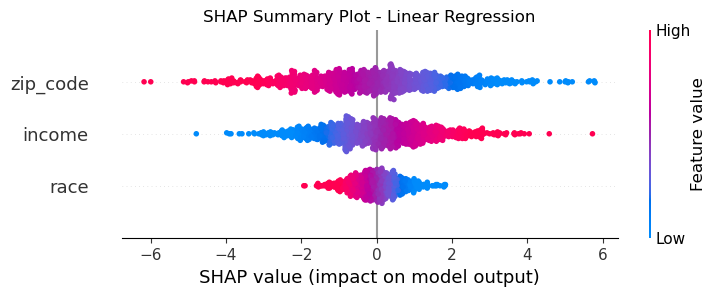


Model: Random Forest


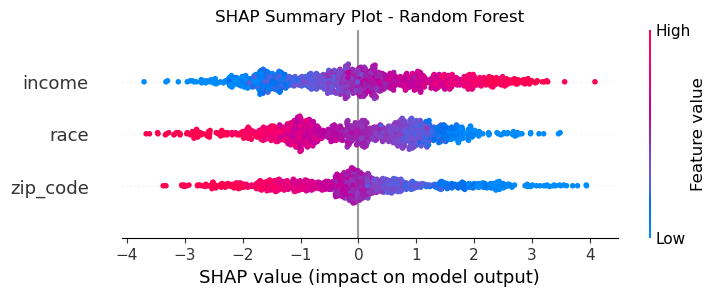


Model: Gradient Boosting


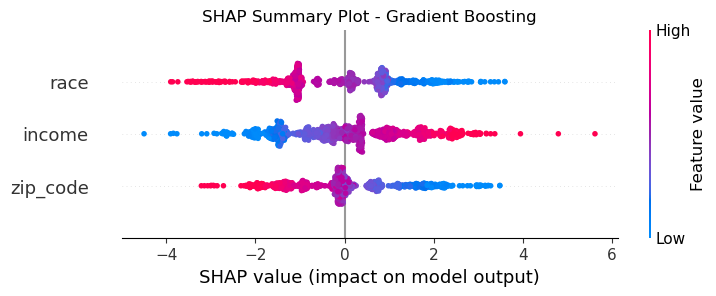

In [1]:
import numpy as np
import pandas as pd
import shap
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

from sklearn.svm import SVR
# 模拟数据参数
np.random.seed(42)
n = 1000
alpha = 0.8
beta = 1.5
gamma = 1


## 这个是 Z 的影响
# 生成数据
# Z = np.random.normal(0,1,n)
# X1 = alpha * Z + np.random.normal(0, 0.1, n)
# X2 = np.random.normal(0,1,n)
# Y = Z  + gamma * X2 + np.random.normal(0, 0.1, n)

# # 组合为 DataFrame
# X = pd.DataFrame({'X1': X1, 'X2': X2})
# y = Y

def g_indirect_effect(N, seed=42):
    np.random.seed(seed)
    
    income = 1 + 3 * np.random.normal(0, 1, N)
    race = 1 + 5 * np.random.normal(0, 1, N)
    zip_code = race + np.random.normal(0, 1, N) / 5
    y = 0.5 * income - 0.5 * zip_code + np.random.normal(0, 1, N)
    
    X = pd.DataFrame({
        'income': income,
        'race': race,
        'zip_code': zip_code
    })
    return X, y

X, y = g_indirect_effect(1000)

# 模型列表
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=100, random_state=42),
}

# SHAP 可视化
for name, model in models.items():
    model.fit(X, y)
    print(f"\nModel: {name}")
    
    # 选择合适的 explainer
    if name in ["Random Forest", "Gradient Boosting", "XGBoost"]:
        explainer = shap.Explainer(model, X)  # TreeExplainer 自动选用
    else:
        explainer = shap.Explainer(model, X)
    
    shap_values = explainer(X)
    shap.plots.beeswarm(shap_values, show=False)
    plt.title(f"SHAP Summary Plot - {name}")
    plt.show()